In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
% matplotlib inline

Dense - fully connected networks
Dropout - used in CNN
Activation - ReLU, Sigmoid, tanh
Sequential - Linear stack of layers

In [3]:
batch_size = 128
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


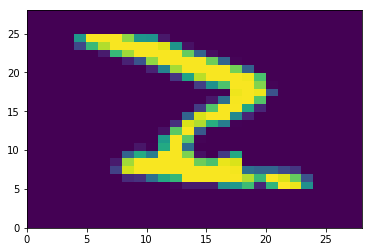

In [4]:
plt.pcolor(x_train[0].reshape(28,28))

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [8]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [10]:
model = Sequential()
model.add(Dense(128,input_shape = (784,)))
model.add(Activation('sigmoid'))


In [11]:
model.add(Dense(10))
model.add(Activation('softmax'))
#To delete a previous layers in keras
#model.layers = model.layers[:-1]
model.summary()
%time model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Wall time: 68.6 ms


In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 2.0138 - acc: 0.5207 - val_loss: 1.7259 - val_acc: 0.7000
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 1.5148 - acc: 0.7407 - val_loss: 1.2956 - val_acc: 0.7882
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 1.1651 - acc: 0.7949 - val_loss: 1.0158 - val_acc: 0.8202
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.9440 - acc: 0.8217 - val_loss: 0.8424 - val_acc: 0.8399
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.8045 - acc: 0.8363 - val_loss: 0.7305 - val_acc: 0.8491
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.7113 - acc: 0.8468 - val_loss: 0.6535 - val_acc: 0.8573
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.6454 - acc: 0.8553 - val_loss: 0.5973 - val_acc: 0.8650
Epoch 8/10
60000/60000 [==============================] - 1s 

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.03224222336
Test accuracy: 0.8159


Using CPU: More number of epochs(iterations) can increase a test accuracy. Due to time and resource constraint, I assigned epochs = 3 . Accuracy was  81.59

Using GPU: Accuracy is 87.96